<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [44]:
%matplotlib inline
import pandas as pd

In [45]:
EVENT_VARIABLES = ['DEATH_CHILD', 'DEATH_FATHER', 'DEATH_HH_PERSON',
                   'DEATH_MOTHER', 'DEATH_PARTNER', 'DIVORCED',
                   'HH_COMP_CHANGE', 'LAST_JOB_ENDED', 'SEPARATED']

def inspect(df, event, row_cond=None):
    related_columns = [i for i in df if event in i]
    if row_cond is None:
        return df.loc[:, ['ID', 'YEAR', 'MIGRATION_STATUS'] + related_columns]
    else:
        return df.loc[row_cond, ['ID', 'YEAR', 'MIGRATION_STATUS'] + related_columns]

In [46]:
df = pd.read_pickle('../../bld/out/data/panel.pkl')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21668 entries, 0 to 9340
Data columns (total 59 columns):
AGE                                         21668 non-null int64
EDUCATION_GROUPS_ISCED97                    21668 non-null object
EMPLOYMENT_STATUS                           21668 non-null category
EVENT_CHILD_DISORDER_COUNT                  21668 non-null float64
EVENT_CHILD_DISORDER_COUNT_PREVIOUS         21668 non-null float64
EVENT_CHILD_DISORDER_TIME_DIFF              21668 non-null float64
EVENT_DEATH_CHILD_COUNT                     21668 non-null float64
EVENT_DEATH_CHILD_COUNT_PREVIOUS            21668 non-null float64
EVENT_DEATH_CHILD_TIME_DIFF                 21668 non-null float64
EVENT_DEATH_FATHER_COUNT                    21668 non-null float64
EVENT_DEATH_FATHER_COUNT_PREVIOUS           21668 non-null float64
EVENT_DEATH_FATHER_TIME_DIFF                21668 non-null float64
EVENT_DEATH_HH_PERSON_COUNT                 21668 non-null float64
EVENT_DEATH_HH_PERSON_C

In [49]:
df.loc[df.HH_NET_INCOME_MONTHLY.isnull(), 'ID']

306        72001
221        72001
307        72002
222        72002
521       102703
523       102903
363       102903
622       124401
436       124401
623       124402
437       124402
735       142102
743       143201
537       143201
744       143202
538       143202
749       144601
842       161102
612       161102
843       161103
861       163301
625       163301
862       163302
626       163302
915       169903
663       169903
961       175001
962       175002
1052      187401
753       187401
          ...   
6659     3831002
6660     3831003
6671     3844802
8864     5007301
8865     5007302
8867     5007401
8868     5007402
9036     5027402
9241     5051002
9288     5057703
7089     5057703
9289     5057704
7090     5057704
7554     5133103
10352    5183901
10353    5183902
8209     5680202
11127    7224301
11128    7224302
11129    7224303
8419     7224303
8456     7236502
11432    8049801
11433    8049802
11938    8166601
11939    8166602
12171    8215301
9196     82153

In [51]:
df.loc[df.ID == 72001, ['ID', 'YEAR', 'HH_NET_INCOME_MONTHLY']]

,ID,YEAR,HH_NET_INCOME_MONTHLY
306,72001,2010,NaN
221,72001,2015,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B670D232E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002B6737C5278>]], dtype=object)

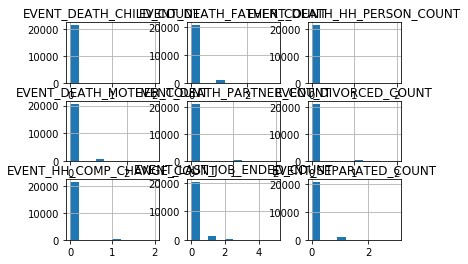

In [13]:
df[['EVENT_' + i + '_COUNT' for i in EVENT_VARIABLES]].hist()

In [25]:
df['EVENT_ALL_COUNT'] = df[['EVENT_' + i + '_COUNT' for i in EVENT_VARIABLES]].sum(axis=1)

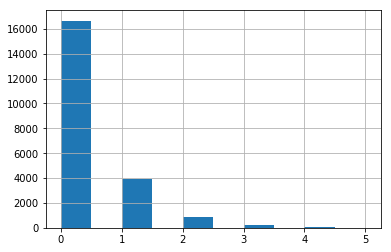

In [27]:
df.EVENT_ALL_COUNT.hist()

In [28]:
len(df.ID.unique())

14398

In [29]:
df.shape

(21668, 56)

In [33]:
a = set(df.loc[df.YEAR == 2010, 'ID'])
b = set(df.loc[df.YEAR == 2015, 'ID'])

In [36]:
len(a & b)

7270